In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
btc = pd.read_csv('btc_april.csv')

In [4]:
btc.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2009-01-03,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2009-01-04,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2009-01-05,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2009-01-06,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2009-01-07,0,0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
#look at Issuance Count to determine exact dates where block reward halvings occured 
#1st halving: 2012-11-29
#2nd halving: 2016-07-10
# ~3rd halving: 2020-05-12 

btc[['date', 'IssContNtv']].head()

,date,IssContNtv
0,2009-01-03,NaN
1,2009-01-04,NaN
2,2009-01-05,NaN
3,2009-01-06,NaN
4,2009-01-07,NaN


In [6]:
#we are only interested in btc volatility 

btc_vol = btc[['date', 'VtyDayRet180d', 'VtyDayRet60d', 'VtyDayRet30d']]

In [7]:
btc_vol.head() 

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
0,2009-01-03,NaN,NaN,NaN
1,2009-01-04,NaN,NaN,NaN
2,2009-01-05,NaN,NaN,NaN
3,2009-01-06,NaN,NaN,NaN
4,2009-01-07,NaN,NaN,NaN


In [8]:
#checking for NaNs 
btc_vol = btc_vol.fillna(0)
btc_vol.isna().sum()

date             0
VtyDayRet180d    0
VtyDayRet60d     0
VtyDayRet30d     0
dtype: int64

In [9]:
btc_vol.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
0,2009-01-03,0.0,0.0,0.0
1,2009-01-04,0.0,0.0,0.0
2,2009-01-05,0.0,0.0,0.0
3,2009-01-06,0.0,0.0,0.0
4,2009-01-07,0.0,0.0,0.0


In [10]:
#had to convert 'date' column to datetime since the 'str' format wasn't beind handled well by 'plt' or 'sns' 

btc_vol['date'] = pd.to_datetime(btc_vol['date'])

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


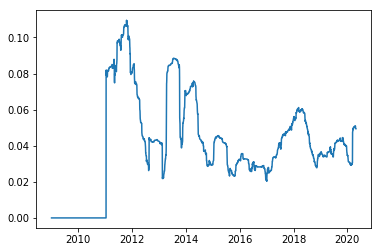

In [11]:
ax = plt.plot(btc_vol['date'], btc_vol['VtyDayRet180d'])

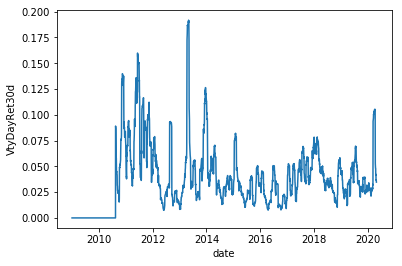

In [12]:
#using seaborn now 
vol_plot_fast = sns.lineplot(x='date', y='VtyDayRet30d', data=btc_vol)

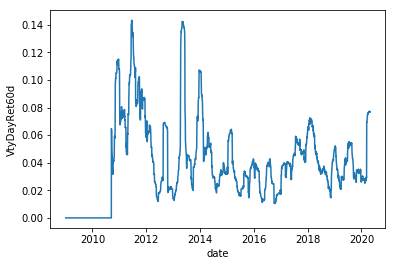

In [13]:
vol_plot_med = sns.lineplot(x='date', y='VtyDayRet60d', data=btc_vol)

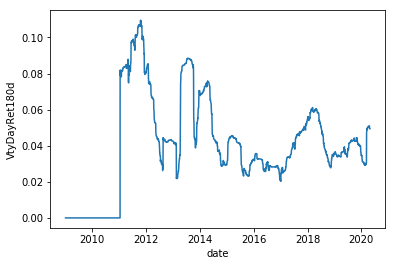

In [14]:
vol_plot_slow = sns.lineplot(x='date', y='VtyDayRet180d', data=btc_vol)

In [15]:
#might be more useful to zoom in 

#divide df for period between inception and 1st halving 
#and from 1st halving to 2nd halving 
#and finally from 2nd halving to preent 

#creating masks 
halv_1 = btc_vol[btc_vol['date'] == '2012-11-29']
halv_2 = btc_vol[btc_vol['date'] == '2016-07-10']

In [16]:
vol_1st_halv = btc_vol[0:halv_1.index[0]+1]
vol_2nd_halv = btc_vol[halv_1.index[0]:halv_2.index[0]+1]
vol_pre = btc_vol[halv_2.index[0]:-1]

In [17]:
vol_1st_halv.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
0,2009-01-03,0.0,0.0,0.0
1,2009-01-04,0.0,0.0,0.0
2,2009-01-05,0.0,0.0,0.0
3,2009-01-06,0.0,0.0,0.0
4,2009-01-07,0.0,0.0,0.0


In [18]:
vol_2nd_halv.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
1426,2012-11-29,0.043314,0.022129,0.018274
1427,2012-11-30,0.043307,0.022146,0.017831
1428,2012-12-01,0.043308,0.021721,0.014788
1429,2012-12-02,0.043272,0.021685,0.014778
1430,2012-12-03,0.043276,0.021734,0.014797


In [69]:
vol_pre.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
2745,2016-07-10,0.031079,0.039983,0.050612
2746,2016-07-11,0.031028,0.039988,0.050061
2747,2016-07-12,0.031090,0.040106,0.046743
2748,2016-07-13,0.028782,0.040222,0.045894
2749,2016-07-14,0.028533,0.040223,0.045648


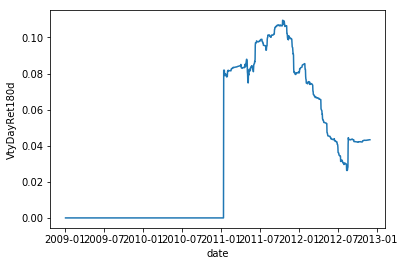

In [20]:
vol_halv1_plot = sns.lineplot(x='date', y='VtyDayRet180d', data=vol_1st_halv)

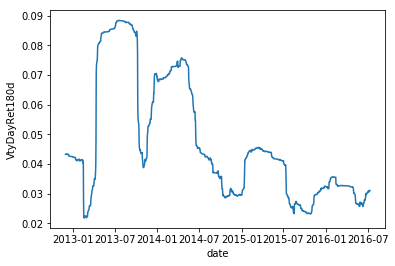

In [21]:
vol_halv2_plot = sns.lineplot(x='date', y='VtyDayRet180d', data=vol_2nd_halv)

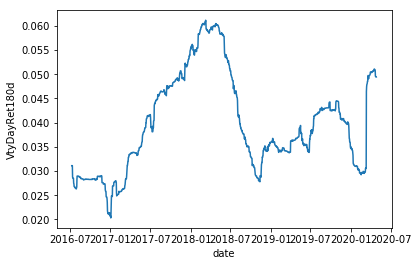

In [22]:
vol_pre_plot = sns.lineplot(x='date', y='VtyDayRet180d', data=vol_pre)

In [23]:
#let's further zoom in and analyze volatility 1 month prior and 1 month post 1st halving 

first_halv_prior_post =  btc_vol[halv_1.index[0]-30:halv_1.index[0]+31]

In [24]:
#30 days prior and 30 days post 1st halving 

first_halv_prior_post.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
1396,2012-10-30,0.042819,0.021382,0.024892
1397,2012-10-31,0.042842,0.021572,0.025499
1398,2012-11-01,0.043020,0.022380,0.025830
1399,2012-11-02,0.043027,0.022152,0.025612
1400,2012-11-03,0.043030,0.022134,0.025828


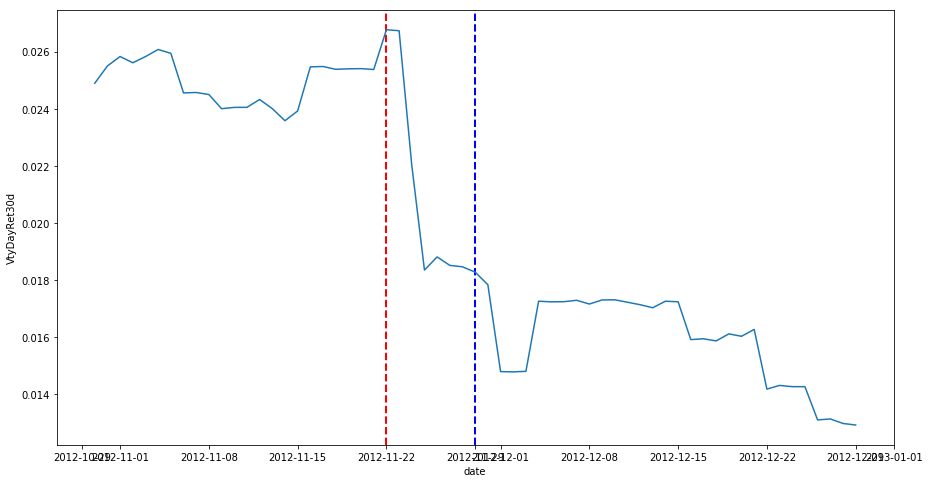

In [68]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

plt.figure(figsize=(15, 8))
plt.axvline(halv1, color='r', linestyle='--', lw=2)
plt.axvline('2012-11-29', color='b', linestyle='--', lw=2)
halv1_pre_post = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv_prior_post)

In [26]:
max_vol = max(first_halv_prior_post['VtyDayRet30d'])
max_vol

0.02677020575468653

In [86]:
#creating mask in order to map index to date of max volatility 

max_v = first_halv_prior_post[['VtyDayRet30d']][first_halv_prior_post[['VtyDayRet30d']] == max_vol]
max_v = max_v.dropna()
max_v

,VtyDayRet30d
1419,0.02677


In [87]:
max_val_index = max_v.index[0]
max_val_index

1419

In [67]:
halv1 = first_halv_prior_post[['date', 'VtyDayRet30d']].loc[max_val_index][0]
halv1

Timestamp('2012-11-22 00:00:00')

In [32]:
#repeating the process from above to the data from the 2nd halving 

first_halv2_prior_post = btc_vol[halv_2.index[0]-30:halv_2.index[0]+31]

In [33]:
first_halv2_prior_post.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
2715,2016-06-10,0.025709,0.021718,0.026097
2716,2016-06-11,0.025862,0.022260,0.026853
2717,2016-06-12,0.026702,0.025423,0.031674
2718,2016-06-13,0.026868,0.025977,0.032293
2719,2016-06-14,0.026963,0.026392,0.033175


In [41]:
max_vol2 = max(first_halv2_prior_post['VtyDayRet30d'])
max_vol2

0.050743380855554084

In [88]:
max_v2 = first_halv2_prior_post[['VtyDayRet30d']][first_halv2_prior_post[['VtyDayRet30d']] == max_vol2]
max_v2 = max_v2.dropna()
max_v2

,VtyDayRet30d
2731,0.050743


In [89]:
max_val2_index = max_v2.index[0]
max_val2_index

2731

In [59]:
halv2 = first_halv2_prior_post[['date', 'VtyDayRet30d']].loc[max_val2_index][0]
halv2

Timestamp('2016-06-26 00:00:00')

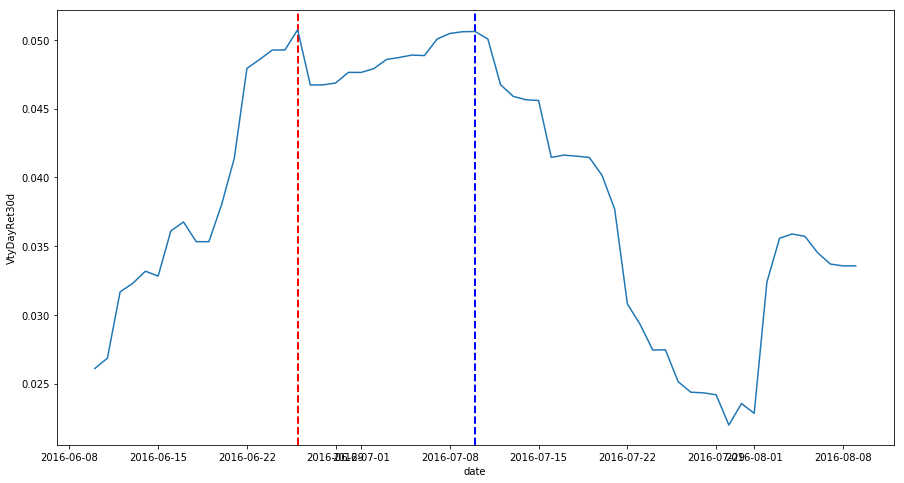

In [64]:
#red line shows us max volatility for the current period 
#blue line shows exact date of halving 

plt.figure(figsize=(15, 8))
plt.axvline(halv2, color='r', linestyle='--', lw=2)
plt.axvline('2016-07-10', color='b', linestyle='--', lw=2)
halv2_pre_post = sns.lineplot(x='date', y='VtyDayRet30d', data=first_halv2_prior_post)

In [90]:
#since we don't have the data yet for the 3rd halving we compute the last 30 days of btc volatility 

first_pre_prior_post =  btc_vol[-31:-1]

In [91]:
first_pre_prior_post.head()

,date,VtyDayRet180d,VtyDayRet60d,VtyDayRet30d
4102,2020-03-28,0.049850,0.074868,0.102913
4103,2020-03-29,0.050000,0.075107,0.103190
4104,2020-03-30,0.050428,0.075996,0.104759
4105,2020-03-31,0.050420,0.075989,0.104768
4106,2020-04-01,0.050477,0.076144,0.104622


In [92]:
max_vol3 = max(first_pre_prior_post['VtyDayRet30d'])
max_vol3

0.10550153113606088

In [93]:
max_v3 = first_pre_prior_post[['VtyDayRet30d']][first_pre_prior_post[['VtyDayRet30d']] == max_vol3]
max_v3 = max_v3.dropna()
max_v3

,VtyDayRet30d
4111,0.105502


In [94]:
max_val3_index = max_v3.index[0]
max_val3_index

4111

In [95]:
halv3 = first_pre_prior_post[['date', 'VtyDayRet30d']].loc[max_val3_index][0]
halv3

Timestamp('2020-04-06 00:00:00')

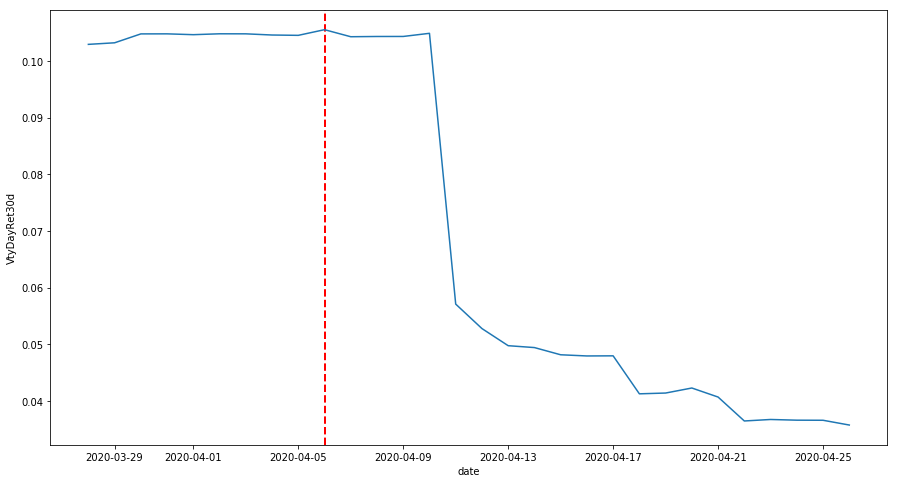

In [85]:
plt.figure(figsize=(15, 8))
plt.axvline(halv3, color='r', linestyle='--', lw=2)
halv2_pre_post = sns.lineplot(x='date', y='VtyDayRet30d', data=first_pre_prior_post)